
## Problem 2.2 - Explore the $\theta$-rule for exponential growth

This exercise asks you to solve the ODE $u'=-au$ with $a < 0$ such that
the ODE models exponential growth instead of exponential decay.  A
central theme is to investigate numerical artifacts and non-physical
solution behavior.

1) Set $a=-1$ and run experiments with $\theta=0, 0.5, 1$ for various values of $\Delta t$ to uncover numerical artifacts. Recall that the exact solution is a monotone, growing function when $a < 0$. Oscillations or significantly wrong growth are signs of wrong qualitative behavior.

From the experiments, select four values of $\Delta t$ that
demonstrate the kind of numerical solutions that are characteristic
for this model.

2) Write up the amplification factor and plot it for $\theta=0,0.5,1$ together with the exact one for $a\Delta t < 0$. Use the plot to explain the observations made in the experiments.

Hint: [decay_ampf_plot.py](https://github.com/hplgit/decay-book/blob/master/src/analysis/decay_ampf_plot.py)

First create a solver for exponential decay using $a=-1$:

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

def solver(T, dt, theta, a=-1, I=1):
    """Solve u'=-a*u, u(0)=I, for t in (0,T] with steps of dt."""
    Nt = int(round(T/dt))        # no of time intervals
    T = Nt*dt                    # adjust T to fit time step dt
    u = np.zeros(Nt+1)           # array of u[n] values
    t = np.linspace(0, T, Nt+1)  # time mesh
    u[0] = I                     # assign initial condition
    for n in range(0, Nt):       # n=0,1,...,Nt-1
        u[n+1] = (1 - (1-theta)*a*dt)/(1 + theta*dt*a)*u[n]
    return t, u

def u_exact(t, I, a):
    return I*np.exp(-a*t)

Now plot the solution for various $\Delta t$

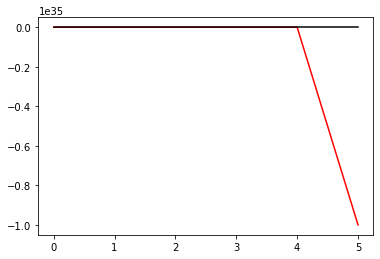

In [28]:
t, u = solver(5, 1.0000001, 1)
plt.plot(t, u, 'r', t, u_exact(t, 1, -1), 'k')

ZeroDivisionError: division by zero

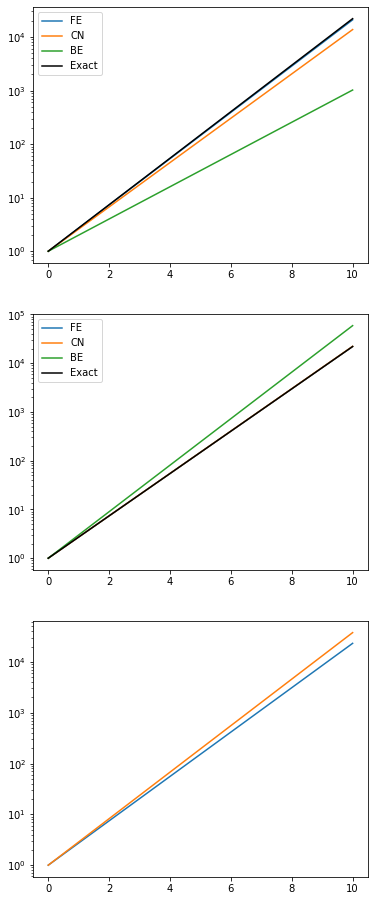

In [29]:
T = 10
fig, ax = plt.subplots(3, figsize=(6, 16))
for i, theta in enumerate((0, 0.5, 1)):
    for j, dt in enumerate((0.01, 0.1, 1)):
        t, u = solver(T, dt, theta)
        ax[i].semilogy(t, u)
    ax[i].semilogy(t, u_exact(t, 1, -1), 'k')
    ax[i].legend(['FE', 'CN', 'BE', 'Exact'])
    

In [32]:
def A_exact(p):
    return np.exp(-p)

def A(p, theta):
    return (1-(1-theta)*p)/(1+theta*p)

def amplification_factor(names):
    curves = {}
    p = np.linspace(0, -1, 15)
    curves['exact'] = A_exact(p)
    plt.plot(p, curves['exact'])
    name2theta = dict(FE=0, BE=1, CN=0.5)
    for name in names:
        curves[name] = A(p, name2theta[name])
        plt.plot(p, curves[name])
    plt.plot([p[0], p[-1]], [0, 0], '--')  # A=0 line
    plt.title('Amplification factors')
    plt.legend(['exact'] + names, loc='lower left', fancybox=True)
    plt.xlabel('$p=a\Delta t$')
    plt.ylabel('Amplification factor')
    plt.savefig('A_factors.png')
    plt.savefig('A_factors.pdf')

/Users/mikaelmortensen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


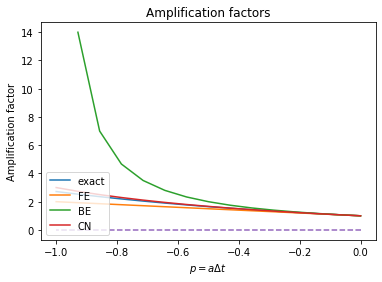

In [33]:
amplification_factor(['FE', 'BE', 'CN'])